# 1.7 Integración numérica

Este libro es para la parte de código de la [sección 1.7 de las notas](https://itam-ds.github.io/analisis-numerico-computo-cientifico/1.computo_cientifico/1.7/Integracion_numerica.html).

La función `quad` es un algoritmo implementado por scipy que se usa para calcular la integral definida de una función.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import quad

# Newton-Cotes
**Ejemplo**:
<br>En las siguientes reglas se considerará la función $f(x)=e^{-x^2}$ la cual tiene una forma:

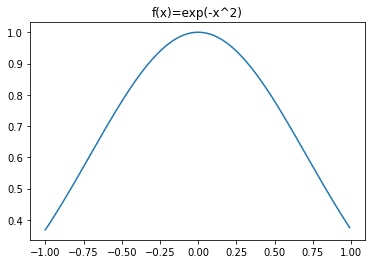

In [2]:
#Se define la función por integrar
f = lambda x: np.exp(-x**2)

#Se definen los puntos por evaluar
x = np.arange(-1,1,.01)

#Gráfica de la función
plt.plot(x, f(x))
plt.title('f(x)=exp(-x^2)')

plt.show()

In [3]:
obj, err = quad(f, 0, 1)
obj, err

(0.7468241328124271, 8.291413475940725e-15)

## Regla simple del rectángulo
**Ejemplo**:
<br>Utilizar la regla simple del rectángulo para aproximar la integral: $\int_{0}^{1}e^{-x^2}{dx}$

In [4]:
def Rf(f,a,b):
    """
    Compute numerical approximation using simple rectangle or midpoint method in 
    an interval.
    """
    node = a + (b - a)/2.0 #mid point formula to minimize rounding errors
    return f(node) #zero degree polynomial

rf_simple = Rf(f,0,1)
print(f"Aprx. Integral, rect. simple: {rf_simple:.6f}")

Aprx. Integral, rect. simple: 0.778801


### Calculando el error

In [5]:
def compute_error(obj,approx):
    '''
    Relative or absolute error between obj and approx.
    '''
    if math.fabs(obj) > np.nextafter(0,1):
        Err = math.fabs(obj-approx)/math.fabs(obj)
    else:
        Err = math.fabs(obj-approx)
    return Err

rf_err = compute_error(obj, rf_simple)
print(f"Rect. simple error: {rf_err * 100:.6f}%")

Rect. simple error: 4.281684%


## Regla compuesta del rectángulo
**Ejemplo**:
<br>Utilizar la regla compuesta del rectángulo para aproximar la integral: $\int_{0}^{1}e^{-x^2}{dx}$

In [6]:
def Rcf(f,a,b,n):
    """
    Compute numerical approximation using rectangle or mid-point
    method in an interval.
    Nodes are generated via formula: x_i = a+(i+1/2)h_hat for
    i=0,1,...,n-1 and h_hat=(b-a)/n
    Args:
    
        f (function): function expression of integrand.
        
        a (float): left point of interval.
        
        b (float): right point of interval.
        
        n (float): number of subintervals.
        
    Returns:
    
        sum_res (float): numerical approximation to integral
            of f in the interval a,b
    """
    h_hat = (b - a)/n
    nodes = [a + (i+1/2) * h_hat for i in range(0,n)]
    sum_res = 0
    for node in nodes:
        sum_res = sum_res + f(node)
    return h_hat * sum_res

**1 nodo**:

In [7]:
n = 1
a, b = 0, 1

#Evaluando rcf
rcf_1 = Rcf(f, a, b, n)

#Comparando con rect. simple
print(f"Aprx. rectángulo simple: {rf_simple:.6f}")
print(f"Aprx. rect. comp. 1 nodo: {rcf_1:.6f}")

Aprx. rectángulo simple: 0.778801
Aprx. rect. comp. 1 nodo: 0.778801


**2 nodos**:

In [8]:
n = 2
a, b = 0, 1

#Evaluando rcf
rcf_2 = Rcf(f, a, b, n)

#Comparando con rect. simple
print(f"Aprx. rectángulo simple: {rf_simple:.6f}")
print(f"Aprx. rect. comp. 2 nodo: {rcf_2:.6f}")

Aprx. rectángulo simple: 0.778801
Aprx. rect. comp. 2 nodo: 0.754598


**$10^3$ nodo**:

In [9]:
n = int(1e3)
a, b = 0, 1

#Evaluando rcf
rcf_n = Rcf(f, a, b, n)

#Comparando con rect. simple
print(f"Aprx. rectángulo simple: {rf_simple:.6f}")
print(f"Aprx. rect. comp. 1e3 nodo: {rcf_n:.6f}")

Aprx. rectángulo simple: 0.778801
Aprx. rect. comp. 1e3 nodo: 0.746824


### Calculando el error

In [10]:
rcf_err_1 = compute_error(obj, rcf_1)
rcf_err_2 = compute_error(obj, rcf_2)
rcf_err_n = compute_error(obj, rcf_n)

rcf_dict = {"Aproximaciones Rcf": ["Rcf_1", "Rcf_2", "Rcf_3"],
            "Número de nodos" : [1, 2, 1e3],
            "Errores relativos": [rcf_err_1, rcf_err_2, rcf_err_n]}

pd.DataFrame(rcf_dict)

,Aproximaciones Rcf,Número de nodos,Errores relativos
0,Rcf_1,1.0,4.281684e-02
1,Rcf_2,2.0,1.040916e-02
2,Rcf_3,1000.0,4.104932e-08


**Evaluando** el error utilizando `pytest`

In [11]:
from pytest import approx

In [12]:
print(f"Regla comp. rect. 1 nodos: {rcf_1 == approx(obj)}")
print(f"Regla comp. rect. 2 nodos: {rcf_2 == approx(obj)}")
print(f"Regla comp. rect. n nodos: {rcf_n == approx(obj)}")

Regla comp. rect. 1 nodos: False
Regla comp. rect. 2 nodos: False
Regla comp. rect. n nodos: True


**Bajando** la tolerancia 

In [13]:
print(f"Regla comp. rect. 1 nodos: {rcf_1 == approx(obj, abs=1e-1, rel=1e-1)}")
print(f"Regla comp. rect. 2 nodos: {rcf_2 == approx(obj, abs=1e-1, rel=1e-1)}")
print(f"Regla comp. rect. n nodos: {rcf_n == approx(obj, abs=1e-1, rel=1e-1)}")

Regla comp. rect. 1 nodos: True
Regla comp. rect. 2 nodos: True
Regla comp. rect. n nodos: True


### Pregunta
¿Es el método del rectángulo un método estable numéricamente bajo el redondeo? Para responder, se aproxima la integral con un mayor número de nodos.

In [14]:
n = int(1e5)
rcf_4 = Rcf(f, a, b, n)
rcf_err_4 = compute_error(obj, rcf_4)

print(f"Aprx. rect. comp. 1e3 nodo: {rcf_err_n:e}")
print(f"Aprx. rect. comp. 1e5 nodo: {rcf_err_4:e}")

Aprx. rect. comp. 1e3 nodo: 4.104932e-08
Aprx. rect. comp. 1e5 nodo: 4.099427e-12


El error bajó aún más con una $h$ más pequeña $\therefore$ el problema es numéricamente estable.

## Regla compuesta del trapecio
**Ejemplo**:
<br>Con la regla compuesta del trapecio se aproximará la integral $\int_{0}^{1}e^{-x^2}{dx}$.
<br>Se calculará el error relativo y graficará $n_{sub}$ vs Error relativo para $n_{sub}=[1,10,...,10^4]$.

In [15]:
def Tcf(n,f,a,b): #Tcf: trapecio compuesto para f
    """
    Compute numerical approximation using trapezoidal method in 
    an interval.
    Nodes are generated via formula: x_i = a+ih_hat for i=0,1,...,n and h_hat=(b-a)/n
    Args:
        f (function): function expression of integrand
        a (float): left point of interval
        b (float): right point of interval
        n (float): number of subintervals
    Returns:
        sum_res (float): numerical approximation to integral of f in the interval a,b
    """
    h=b-a
    nodes=np.linspace(a,b,n+1)
    sum_res=sum(f(nodes[1:-1]))
    return h/(2*n)*(f(nodes[0])+f(nodes[-1])+2*sum_res)


def compute_error_point_wise(obj, approx):
    '''
    Relative or absolute error between obj and approx (Element wise).
    '''
    if np.abs(obj) > np.nextafter(0,1):
        Err = np.abs(obj - approx)/np.abs(obj)
    else:
        Err = np.abs(obj - approx)
    return Err

In [16]:
#Subintervalos
numb_of_subintervals = (1,10,100,1000,10000)

#Evaluando la integral
tcf_approx = np.array([ Tcf(n,f,0,1) for n in numb_of_subintervals ])

#Calculando el error
relative_errors = compute_error_point_wise(obj, tcf_approx)
relative_errors

array([8.42024373e-02, 8.21259857e-04, 8.20989064e-06, 8.20986364e-08,
       8.20987410e-10])

**Graficando** el error

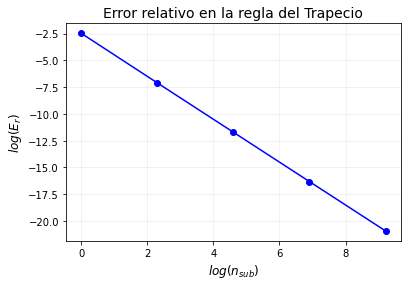

In [17]:
plt.plot(np.log(numb_of_subintervals), np.log(relative_errors), 'o-', c='b')

#Anotaciones y estilo
plt.xlabel('$log(n_{sub})$', fontsize=12)
plt.ylabel('$log({E}_{r})$', fontsize=12)
plt.title('Error relativo en la regla del Trapecio', fontsize=14)
plt.grid(alpha=0.2)

plt.show()

# Práctica 1

In [18]:
h = lambda x: x**2

Para todo el intervalo $x\in(\infty^{-},\infty^{+})$

In [19]:
iteraciones = []

n = int(1e6)
for i in range(100):
    normal_rvs = np.random.normal(loc=0, scale=1, size=n)
    
    integral = np.mean(h(normal_rvs) * np.sqrt(2*np.pi))
    iteraciones.append(integral)
    
np.mean(iteraciones)

2.50638674602911

In [20]:
#Target
np.sqrt(2*np.pi)

2.5066282746310002

Para el intervalo $x\in(\infty^{-},b)$, se define la siguiente función a trozos para la distribución normal:
$g(x)=\{N(0,1)\forall x\leq b, 0 \forall x>b\}$

In [21]:
iteraciones = []

n = int(1e6)
for i in range(100):
    normal_rvs = np.random.normal(loc=0, scale=1, size=n)
    #Aquí lo nuevo
    normal_rvs = np.array(list(map(lambda x: 0 if x >= 1.2 else x, normal_rvs)))
    
    integral = np.mean(h(normal_rvs) * np.sqrt(2*np.pi))
    iteraciones.append(integral)
    
np.mean(iteraciones)

1.6344275289045809